<a href="https://colab.research.google.com/github/eshu077/Complete_Machine_Learning/blob/main/UnSupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)

In [ ]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [ ]:
y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

In [ ]:
X.shape

(1000, 2)

In [ ]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [ ]:
X[:, 0]

array([-6.59633932, -6.13753182,  5.19820575, -2.96855852, -2.76878897,
       -6.82261407,  5.02007669,  5.55620651,  4.86379297,  5.8463878 ,
       -2.17159496, -4.97843651, -2.31013793,  5.55819544,  5.25265274,
        5.85297654, -3.29245092, -1.96210024, -1.53407789, -2.18227025,
        4.60519395, -6.4758971 , -7.18766148, -9.00148209,  4.01673831,
       -2.45347271, -3.20892313, -3.18611962,  4.81977299,  4.9069291 ,
       -6.44268902, -8.30143786,  4.61485188, -1.98725606, -3.6601912 ,
       -6.58606926, -7.46015064,  4.08467931, -6.36842459, -6.83602474,
       -0.62717313,  3.98846083, -2.99680385, -7.21440252, -0.66024153,
       -4.23528384, -3.15984019, -2.40986532, -8.75479966,  4.56971312,
       -7.54869993, -1.60959775,  5.04813159, -7.65250486, -1.79758274,
       -9.01530141, -3.57150134, -1.651538  , -3.47412108,  6.31245122,
        4.03851119, -3.17098409, -6.90693173, -6.22372641, -3.22204341,
       -0.36525353, -7.76711937,  4.15669237,  4.1936954 , -3.03

In [ ]:
X[:, 1]

array([-7.13901457e+00, -6.58081701e+00,  2.04917508e+00,  8.16444176e+00,
        7.51114318e+00, -6.61151731e+00,  2.58375543e+00,  2.31965816e+00,
        3.33731011e+00,  1.15623401e+00,  8.60240916e+00, -6.94077041e+00,
        8.41406925e+00,  4.02669080e-01,  9.19754121e-01,  2.11488660e+00,
        8.69222461e+00,  8.81209348e+00,  8.86722875e+00,  8.79518560e+00,
        2.20738442e+00, -6.90430520e+00, -6.10044906e+00, -7.48793158e+00,
        1.41769256e+00,  1.01084776e+01,  9.22826604e+00,  9.62596242e+00,
        3.36517197e+00,  2.86280048e+00, -5.68946332e+00, -5.37877594e+00,
        2.79093598e+00,  9.31127080e+00,  9.38998415e+00, -8.23669140e+00,
       -6.29153119e+00,  3.85432675e+00, -5.50645105e+00, -5.18505855e+00,
        1.03597062e+01,  1.48928385e+00,  8.58172794e+00, -7.28375806e+00,
        1.01408512e+01, -8.38307992e+00,  8.52716074e+00,  9.76567325e+00,
       -6.76508351e+00,  3.12208750e-01, -5.84020491e+00,  9.32158565e+00,
        2.70586080e-01, -

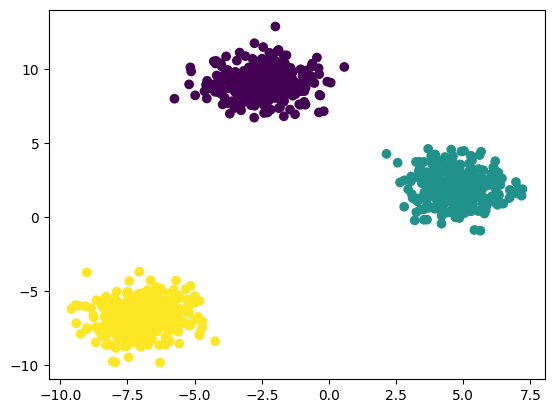

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

**Start Implementation**

In [ ]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((670, 2), (330, 2))

**Scaling**

In [ ]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train

array([[ 3.45228042,  2.28299039],
       [-5.38693862, -7.15123319],
       [ 4.63380792,  2.81166046],
       ...,
       [-1.99416236,  9.52807208],
       [ 4.68369031,  1.82616768],
       [-7.0081647 , -8.76195864]])

In [ ]:
X_train_sc

array([[ 1.04850102,  0.11123111],
       [-0.79112419, -1.32318965],
       [ 1.29440146,  0.19161242],
       ...,
       [-0.08501693,  1.21280512],
       [ 1.30478302,  0.04177378],
       [-1.12853504, -1.56809142]])

**KMeans**

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X_train_sc)

KMeans(n_clusters=3)

In [ ]:
y_pred_train = kmeans.predict(X_train_sc)
y_pred_test = kmeans.predict(X_test_sc)

In [ ]:
y_train

array([1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1,
       1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1,
       0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1,
       0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2,
       2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 2,
       1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0,

In [ ]:
y_pred_train

array([2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2,
       2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0,
       1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2,
       0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1,
       2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0,

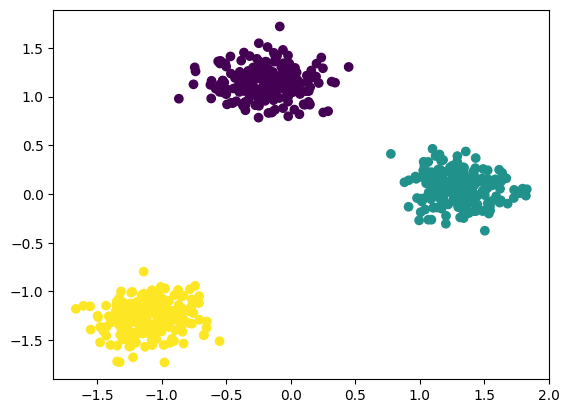

In [ ]:
plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train)

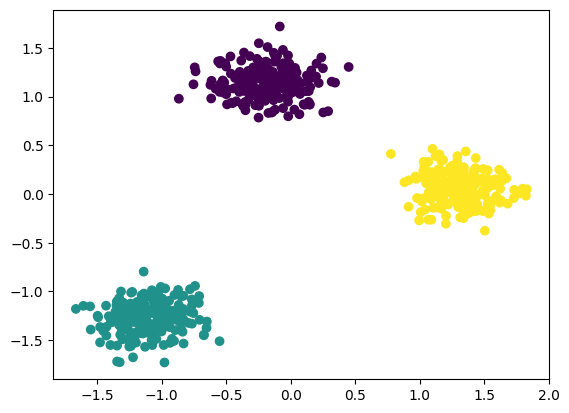

In [ ]:
plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_pred_train)

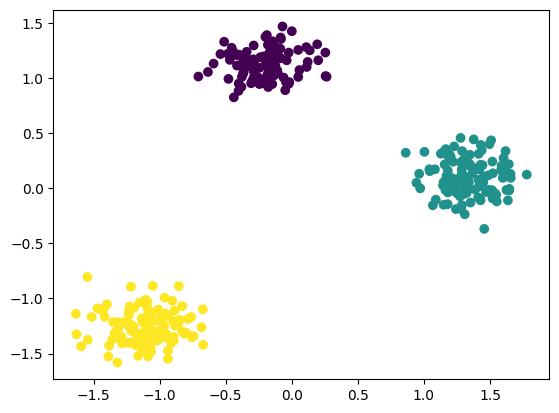

In [ ]:
plt.scatter(X_test_sc[:, 0], X_test_sc[:, 1], c=y_test)

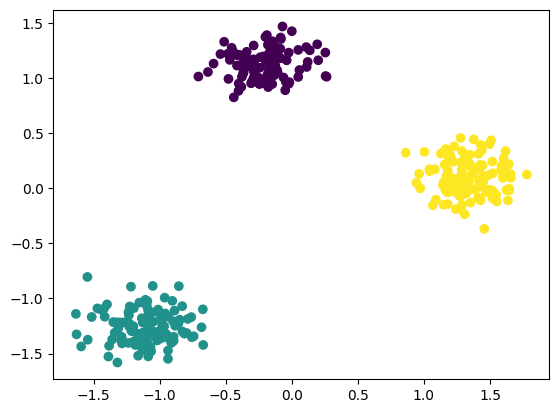

In [ ]:
plt.scatter(X_test_sc[:, 0], X_test_sc[:, 1], c=y_pred_test)

**WCSS and Elbow Method**

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_sc)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[1340.0,
 424.77950428412726,
 43.537817283488884,
 36.777534381685435,
 31.676819047075025,
 28.85836510603677,
 23.886548619020374,
 21.47795279894025,
 23.152063789433917,
 18.286002585963544]

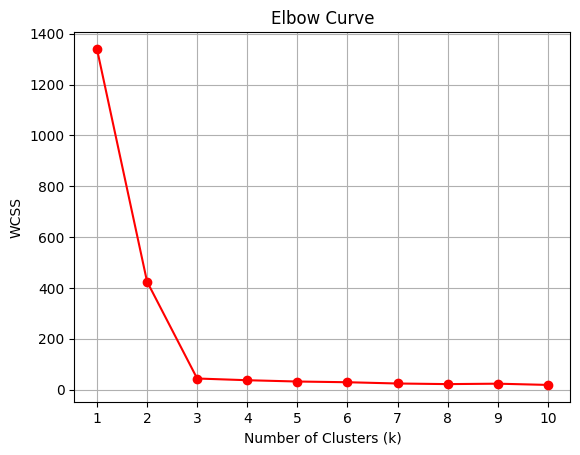

In [ ]:
plt.plot(range(1, 11), wcss, color='r', marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid()
plt.show()


**KneeLocator**

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl

In [ ]:
kl.elbow

np.int64(3)

**Evaluation Metrics - Silhoutte Score**

In [ ]:
silhouette = []

for k in range(2, 11):
    kmns = KMeans(n_clusters=k, init='k-means++')
    kmns.fit(X_train_sc)
    score = silhouette_score(X_train_sc, labels=kmns.labels_)
    silhouette.append(score)

In [ ]:
silhouette

[np.float64(0.6857199772837788),
 np.float64(0.842476016737992),
 np.float64(0.6769634665552863),
 np.float64(0.5210132373399161),
 np.float64(0.5012481995336482),
 np.float64(0.32633623132859146),
 np.float64(0.32718205844071985),
 np.float64(0.31762433269369095),
 np.float64(0.33600918632830384)]

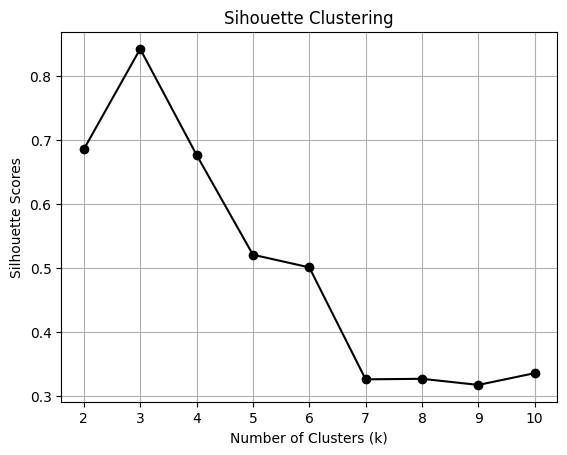

In [ ]:
plt.plot(range(2, 11), silhouette, color='k', marker='o')
plt.title('Sihouette Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.xticks(np.arange(2, 11, 1))
plt.grid()
plt.show()

**DBSCAN CLUSTERING WITH HIGH DENSITY AND NOISE**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [ ]:
X, y  = make_moons(n_samples=1000, noise=0.1, random_state=42)

In [ ]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [ ]:
X.shape

(1000, 2)

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

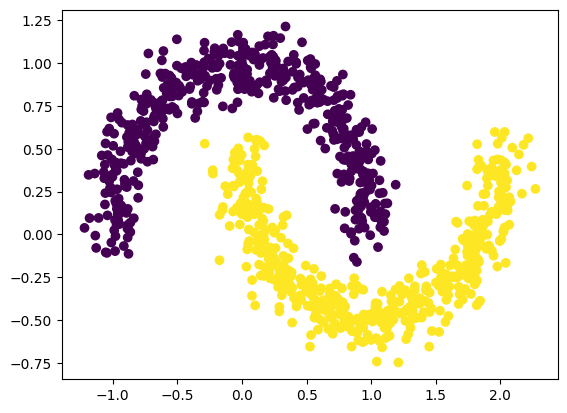

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
# Implementation

In [ ]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.63080129,  0.39150542],
       [ 0.61191562, -1.32649443],
       [ 0.42367059, -0.99855225],
       ...,
       [ 1.36001201, -1.18427533],
       [-1.68110979,  0.03251676],
       [ 0.33156714,  0.73435543]])

**DBSCAN**

In [ ]:
db = DBSCAN(min_samples=5, eps=0.2)
db.fit(X_scaled)

DBSCAN(eps=0.2)

In [ ]:
db.labels_

array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1,
        1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,  1,  0,  0,  1,  0,  0,
        0,  1,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,
        1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  1,
        1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1

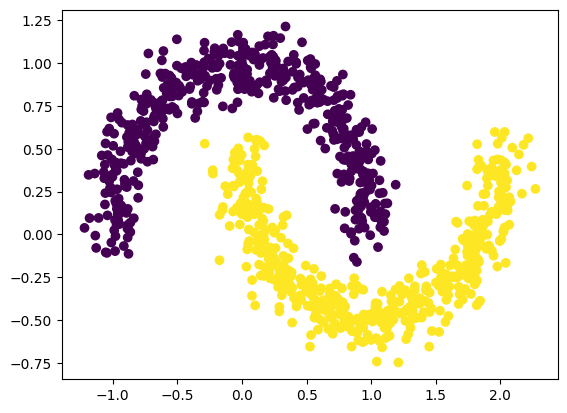

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

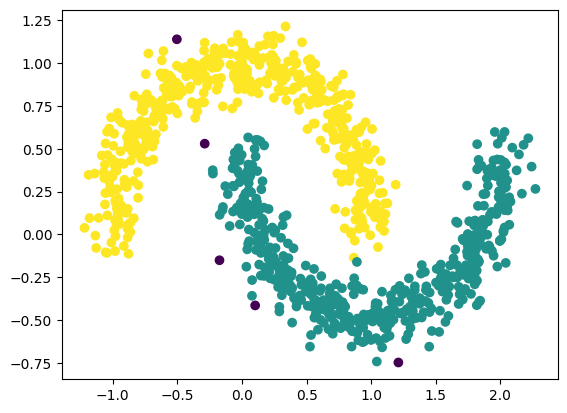

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=db.labels_)

**Once More EXample of DBSCAN_CLUSTERING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [ ]:
X, y  = make_moons(n_samples=250, noise=0.09, random_state=42)

In [ ]:
X

array([[ 7.84156082e-02,  1.38021348e-01],
       [ 1.10087299e+00,  1.57336202e-01],
       [-6.69786963e-01,  7.10540566e-01],
       [ 6.91576809e-02,  8.68803006e-01],
       [-1.04663323e+00,  3.66074780e-01],
       [ 6.94624560e-01, -4.77760260e-01],
       [ 1.34069624e+00, -4.54359241e-01],
       [ 8.69941134e-01, -5.73308206e-01],
       [ 1.04756989e+00,  2.68501727e-01],
       [-9.00040653e-01,  5.81178285e-01],
       [ 1.40029779e+00, -2.85275922e-01],
       [ 1.72140531e+00, -2.56818625e-01],
       [ 1.93338018e+00,  2.45069526e-03],
       [ 1.98767546e+00,  2.72537585e-01],
       [-2.46045261e-01,  9.89711291e-01],
       [ 1.92691340e+00, -1.57986335e-01],
       [ 1.09002925e+00, -3.84871484e-01],
       [ 9.85734626e-01,  6.46448170e-01],
       [ 6.30676153e-01, -4.03242267e-01],
       [ 8.49193623e-01,  5.76603531e-01],
       [ 2.08066261e+00,  4.46675549e-01],
       [ 7.12086174e-01,  3.86734467e-01],
       [-8.45278109e-01,  3.56135134e-01],
       [-1.

In [ ]:
X.shape

(250, 2)

In [ ]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0])

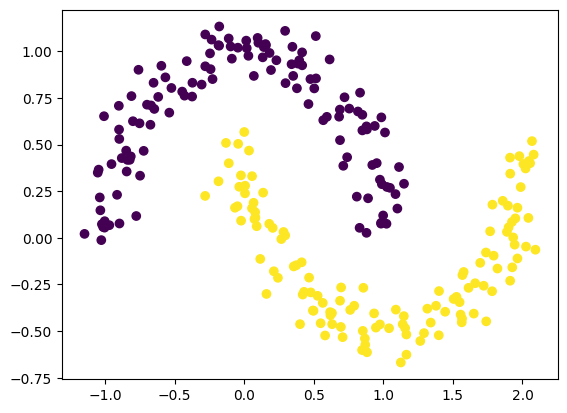

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
# Implementation

In [ ]:
X

array([[ 7.84156082e-02,  1.38021348e-01],
       [ 1.10087299e+00,  1.57336202e-01],
       [-6.69786963e-01,  7.10540566e-01],
       [ 6.91576809e-02,  8.68803006e-01],
       [-1.04663323e+00,  3.66074780e-01],
       [ 6.94624560e-01, -4.77760260e-01],
       [ 1.34069624e+00, -4.54359241e-01],
       [ 8.69941134e-01, -5.73308206e-01],
       [ 1.04756989e+00,  2.68501727e-01],
       [-9.00040653e-01,  5.81178285e-01],
       [ 1.40029779e+00, -2.85275922e-01],
       [ 1.72140531e+00, -2.56818625e-01],
       [ 1.93338018e+00,  2.45069526e-03],
       [ 1.98767546e+00,  2.72537585e-01],
       [-2.46045261e-01,  9.89711291e-01],
       [ 1.92691340e+00, -1.57986335e-01],
       [ 1.09002925e+00, -3.84871484e-01],
       [ 9.85734626e-01,  6.46448170e-01],
       [ 6.30676153e-01, -4.03242267e-01],
       [ 8.49193623e-01,  5.76603531e-01],
       [ 2.08066261e+00,  4.46675549e-01],
       [ 7.12086174e-01,  3.86734467e-01],
       [-8.45278109e-01,  3.56135134e-01],
       [-1.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.48642944, -0.23113354],
       [ 0.67743739, -0.19247654],
       [-1.33811106,  0.91471377],
       [-0.49696777,  1.23146224],
       [-1.76707649,  0.22529553],
       [ 0.21500337, -1.46356674],
       [ 0.95042903, -1.41673164],
       [ 0.41456684, -1.65479763],
       [ 0.61676229,  0.03001157],
       [-1.60020964,  0.65580644],
       [ 1.01827369, -1.07832612],
       [ 1.38379151, -1.02137132],
       [ 1.62508325, -0.50246638],
       [ 1.68688776,  0.03808898],
       [-0.85576439,  1.47344964],
       [ 1.61772209, -0.82356711],
       [ 0.66509392, -1.27765796],
       [ 0.54637498,  0.78643843],
       [ 0.14221068, -1.31442548],
       [ 0.39094988,  0.64665047],
       [ 1.79273535,  0.38661094],
       [ 0.23487999,  0.26664409],
       [-1.53787324,  0.20540219],
       [-0.78628603,  1.56167345],
       [ 0.53467742, -1.43647418],
       [-0.10162493,  1.34559015],
       [-0.31268793,  1.3998029 ],
       [ 0.58837171, -0.35592058],
       [ 0.28380712,

**DBSCAN**

In [ ]:
db = DBSCAN(min_samples=5, eps=0.3)
db.fit(X_scaled)

DBSCAN(eps=0.3)

In [ ]:
db.labels_

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1])

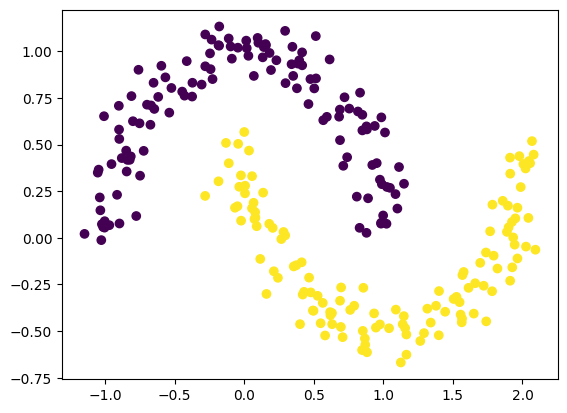

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

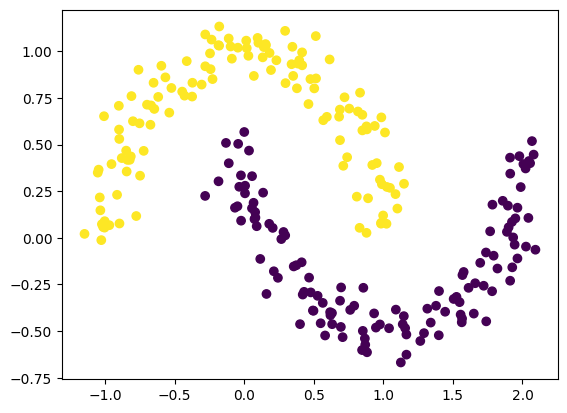

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=db.labels_)

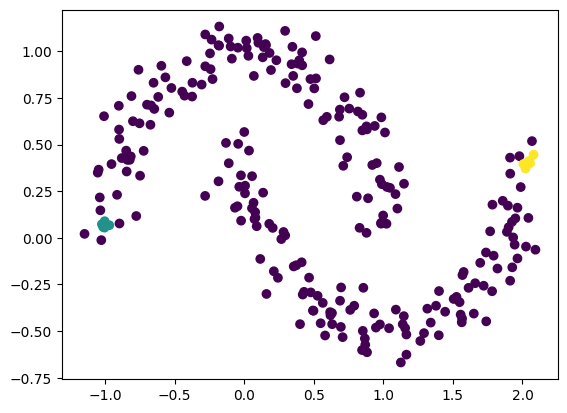

In [ ]:
db = DBSCAN(min_samples=5, eps=0.05)
db.fit(X)

plt.scatter(X[:,0], X[:,1], c=db.labels_)


**Principal_Component_Analysis(PCA)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

In [ ]:
d = load_breast_cancer()
d

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
d.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
d['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
d['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
d['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
print(d['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

**Preparing The DataSet**

In [ ]:
df = pd.DataFrame(d['data'], columns=d['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

scaled_df = sc.fit_transform(df)
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
scaled_df.shape

(569, 30)

**PCA**

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
pca_data.shape

(569, 2)

In [ ]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

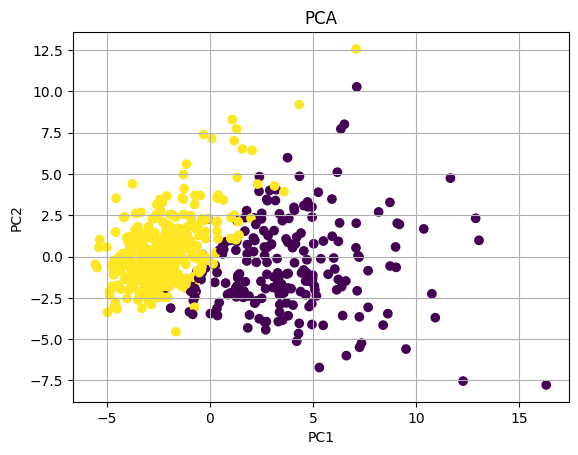

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=d['target'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [ ]:
pca_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
pca_data[:, 0].min()  # pc1

np.float64(-5.565735898981083)

In [ ]:
pca_data[:, 0].max()

np.float64(16.319233231031994)

In [ ]:
pca_data[:, 1].min()

np.float64(-7.7758528042480615)

In [ ]:
pca_data[:, 1].max()

np.float64(12.573194228678526)

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
pca_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
data

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [ ]:
data['Target'] = d['target']

In [ ]:
# d['target']

In [ ]:
data

,PC1,PC2,Target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


In [ ]:
data.corr()

,PC1,PC2,Target
PC1,1.000000e+00,-1.705605e-18,-0.785491
PC2,-1.705605e-18,1.000000e+00,0.188363
Target,-7.854910e-01,1.883627e-01,1.000000


In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['Target'] = d['target']

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.corr()['Target']

,Target
mean radius,-0.730029
mean texture,-0.415185
mean perimeter,-0.742636
mean area,-0.708984
mean smoothness,-0.358560
mean compactness,-0.596534
mean concavity,-0.696360
mean concave points,-0.776614
mean symmetry,-0.330499
mean fractal dimension,0.012838


In [ ]:
data

,PC1,PC2,Target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0
